# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

I removed the commas in the numbers so that there wouldn't be an error in processing the values. After cleaning there were 0 missing values.

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

The proportion missing was 0.7619342359767892. Based on the cross tabulation, if data there is less severe evidence such as tasers or bodily harm there were mans NANs.


3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

Median imputation may lead to underestimated uncertainty and biased inference, resulting in inaccurate conclusions.

In [11]:
! git clone https://github.com/ds4e/get_data
%run ./get_data/get_data.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors

fatal: destination path 'get_data' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

In [4]:
#Q1 cleaning
df = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
df.head()
df['Price'].unique()

df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].unique()
df['Price'].dtype
df['Price'].isna().sum()



np.int64(0)

In [5]:
#q4
df = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")

prop_missing = df["Review Scores Rating"].isna().mean()
print(prop_missing)




median_rating = df["Review Scores Rating"].median()
df["review_score_median_imputed"] = df["Review Scores Rating"].fillna(median_rating)
df["review_score_median_imputed"].isna().sum()

df[["Review Scores Rating", "review_score_median_imputed"]].head()


0.27308222324299497


,Review Scores Rating,review_score_median_imputed
0,NaN,94.0
1,NaN,94.0
2,NaN,94.0
3,NaN,94.0
4,96.0,96.0


In [59]:
# q2
import pandas as pd
import numpy as np

df = pd.read_csv("/content/data/mn_police_use_of_force.csv")

df["subject_injury_clean"] = (
    df["subject_injury"]
    .str.strip()
    .str.lower()
    .map({"yes": "Yes", "no": "No"})
)
df

prop_missing = df["subject_injury_clean"].isna().mean()
print(prop_missing)


0.7619342359767892


In [56]:
df = pd.read_csv("/content/data/mn_police_use_of_force.csv")

df["subject_injury_clean"] = (
    df["subject_injury"]
    .str.strip()
    .str.lower()
    .map({"yes": "Yes", "no": "No"})
)
df

prop_missing = df["subject_injury_clean"].isna().mean()
prop_missing

crosstab = pd.crosstab(
    df["force_type"],
    df["subject_injury_clean"],
    dropna=False
)
crosstab

crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_prop


subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0.000000,0.500000,0.500000
Bodily Force,0.115907,0.136373,0.747720
Chemical Irritant,0.082235,0.025738,0.892028
Firearm,1.000000,0.000000,0.000000
Gun Point Display,0.317308,0.423077,0.259615
Improvised Weapon,0.229730,0.270270,0.500000
Less Lethal,0.000000,0.000000,1.000000
Less Lethal Projectile,0.333333,0.666667,0.000000
Maximal Restraint Technique,0.000000,0.000000,1.000000


In [19]:
#q3

import pandas as pd
import numpy as np

df = pd.read_csv("/content/data/metabric.csv")

df["overall_survival_dummy"] = (
    df["Overall Survival Status"]
    .str.lower()
    .map({"living": 1, "deceased": 0})
)

df["overall_survival_dummy"].value_counts(dropna=False)


,count
overall_survival_dummy,
NaN,1343


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

Each row corresponds to a single attack, including details such as year, age, attack type, and whether the attack was fatal. Treating each row as an individual incident is important for the cleaning process so that  that rows are not combined, and that missing or inconsistent values are handled at the based on each incident.

4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

It seems that attacks have been increasing over time

5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

0.745034

7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?
Unprovoked seemed to be more fatal but there were also more observations for unprovoked. Maybe this is because an unprovoked shark thinks the prey will be easy and not fight back.

0.0
2026.0


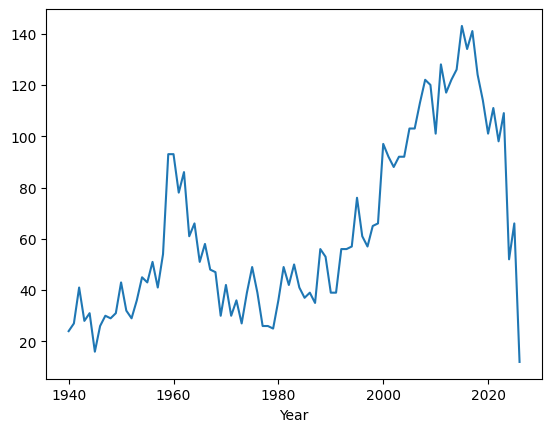

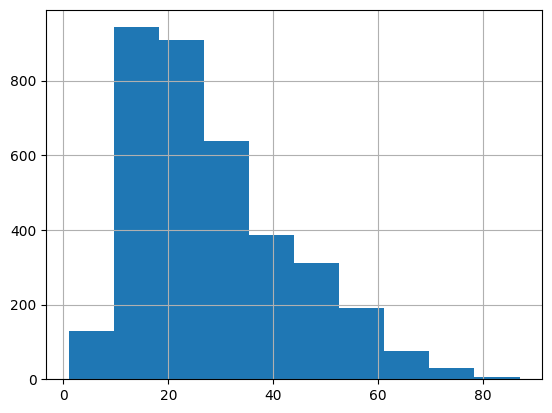

Type_clean
Unprovoked    0.745034
Unknown       0.160888
Provoked      0.094077
Name: proportion, dtype: float64


Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,500,9,12
Unknown,367,400,124
Unprovoked,3379,53,694


In [81]:
import pandas as pd

df = pd.read_excel("/content/GSAF5 (2).xls")

#df.head()

df = df.dropna(axis=1, how='all')

#df.head()

#3
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
print(df['Year'].min())
print(df['Year'].max())

df= df[df["Year"] >= 1940]
df.head()
#4
attack_yearly = df.groupby("Year").size()
attack_yearly.plot()
plt.show()

#5

df["Age_clean"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age_clean"].hist()
plt.show()

#6
df["Type_clean"] = (
    df["Type"]
    .str.lower()
    .map({
        "provoked": "Provoked",
        "unprovoked": "Unprovoked"
    })
    .fillna("Unknown")
)

type_prop = df["Type_clean"].value_counts(normalize=True)
print(type_prop)


#7
df["Fatal Y/N"].str.lower()

df["Fatal_clean"] = (
    df["Fatal Y/N"]
    .str.strip()
    .str.upper()
    .map({"Y": "Y", "N": "N"})
    .fillna("Unknown")
)

#8
fatal_by_type = pd.crosstab(
    df["Type_clean"],
    df["Fatal_clean"]
    )

fatal_by_type





**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

This paper outlines the methods in which one can tidy data as well as indicators of when one should begin to tidy data in order to make things as convenient as possible.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  A standard is suposed to make data cleaning easier because you don't need to restart every time. In other words, the tidy data standard is designed to allow for the EDA to occur and then ease the process of analysis after.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first sentence implies that all particular cases must be considered when cleaning data. For example, just because one column is cleaned in one way, doesn't mean another column does not require cleaning in another way. The second sentence describes how although it might make sense for certain variables to exist in a data set but without proper cleaning, renaming, or description the values/column details are not useful.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  Values are either a collection of strings or numbers as a qualitative or quantitative value. Variables meausre all the values that measure a singular overall trait across units. An observation contains all values measured on the same unit across attributes.

  5. How is "Tidy Data" defined in section 2.3?
  
Tidy data should have each variable forming a column, each observation forming a row, and each type of observational unit forms a table


  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  The most commons issues are: Column headers are values, not variable names,  Multiple variables are stored in one column, Variables are stored in both rows and columns, Multiple types of observational units are stored in the same table, A single observational unit is stored in multiple tables. Melting is described as the process of turning columns into rows. Table 4 is messy because its 3 variables are not columns.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Table 11 doesn't have descriptive column names, many NAs, and is very long in terms of columns compared to the number of rows. 12 is easier to read and more consise. Even though 12 is Molten which doesn't have values in the column it is still cleaner than 11 because it is easier to understand.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

The foreign gift amounts are all towards one end of the histogram, suggesting that all countries spend similar amounts.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?
Qatar

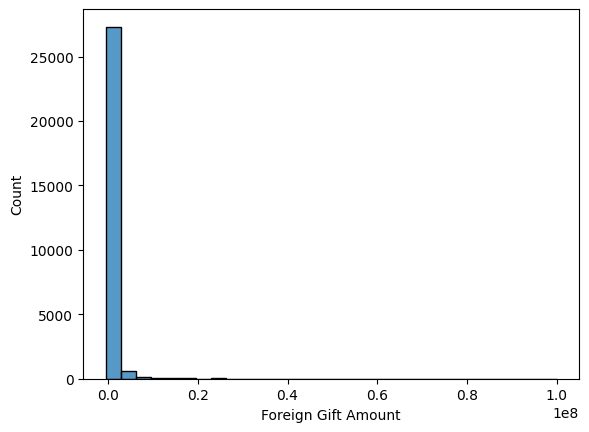

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157

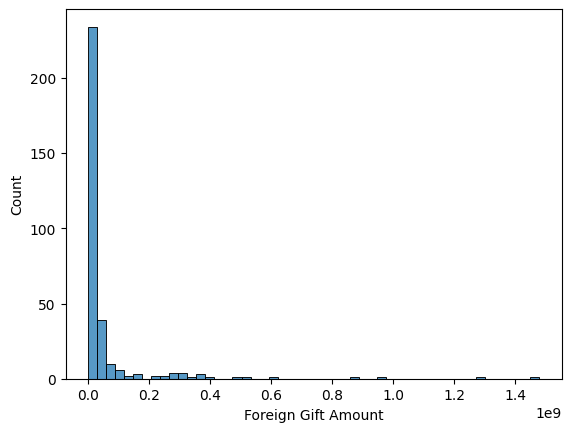

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [101]:
df = pd.read_csv("/content/data/ForeignGifts_edu.csv")
df.head()
#2
sns.histplot(
    df["Foreign Gift Amount"],
    bins=30
)
plt.show()
#3
gift_type_counts = df["Gift Type"].value_counts()

print(gift_type_counts)
#4
top_countries_count = (
    df
    .groupby("Country of Giftor")
    .size()
    .sort_values(ascending=False)
    .head(15)
)

print(top_countries_count)

#5

top_countries_amount = (
    df
    .groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

print(top_countries_amount)



top_institutions = (
    df
    .groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
print(top_institutions)
institution_totals = (
    df
    .groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
)
sns.histplot(institution_totals, bins=50)
plt.show()



#
top_giftors = (
    df
    .groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

print(top_giftors)


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?

Private not for profit

5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

Public not for profit typically has the largest aid value and grad rate, where the two are positively correlated, whereas the other two institutions can reach up to the same grad values but the aid values do not increase as grad increases.

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


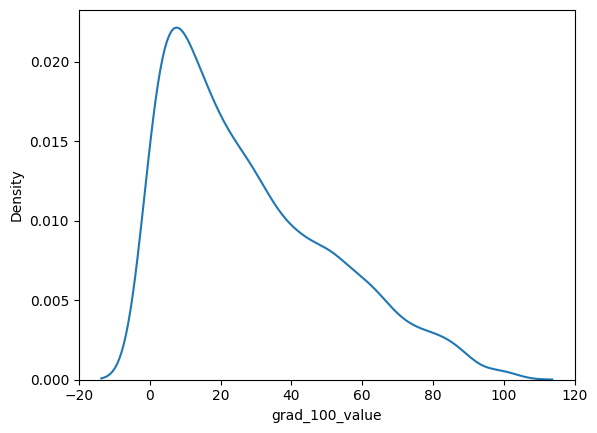

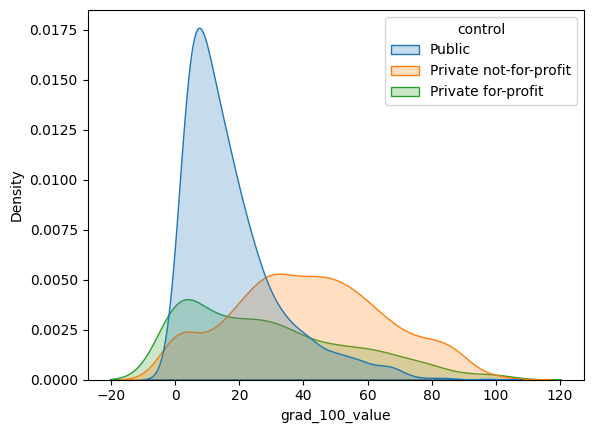

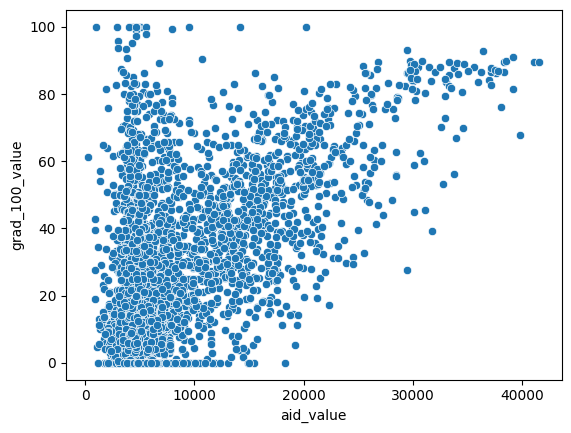

                   aid_value  grad_100_value
aid_value       4.121201e+07    88610.483169
grad_100_value  8.861048e+04      543.483382
                aid_value  grad_100_value
aid_value        1.000000        0.575879
grad_100_value   0.575879        1.000000


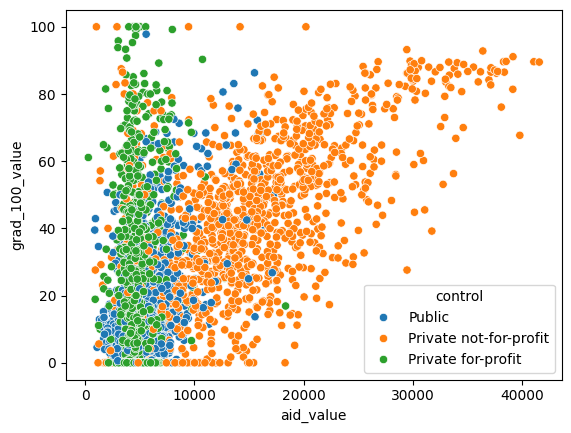

In [10]:
df = pd.read_csv("/content/data/college_completion.csv")
df.head()

print(pd.crosstab(df["control"], df['level']))

sns.kdeplot(df["grad_100_value"].dropna())
plt.show()

df["grad_100_value"].describe()
control_table = sns.kdeplot(
    data=df,
    x="grad_100_value",
    hue="control",
    fill=True
)
plt.show()

desc_by_control = (
    df
    .groupby("control", observed=True)["grad_100_value"]
    .describe()
)


sns.scatterplot(x="aid_value", y="grad_100_value", data=df)
plt.show()

# Covariance and correlation
cov_matrix = df[["aid_value", "grad_100_value"]].cov()
corr_matrix = df[["aid_value", "grad_100_value"]].corr()
print(cov_matrix)
print(corr_matrix)


sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control")
plt.show()



cov_matrix_c = df[["aid_value", "grad_100_value"]].cov()
corr_matrix_c = df[["aid_value", "grad_100_value"]].corr()




**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

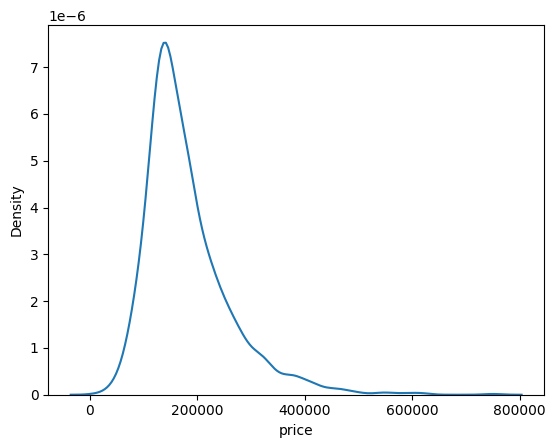

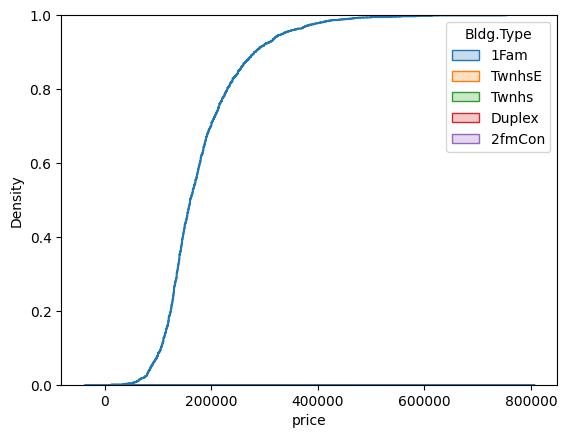

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


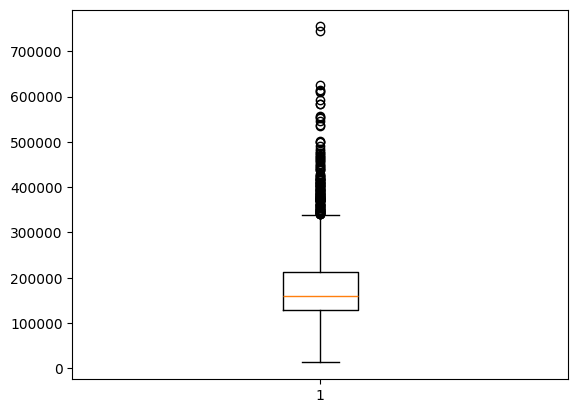

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


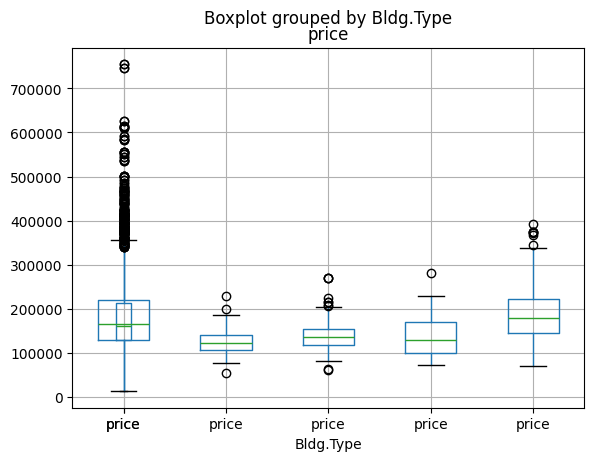

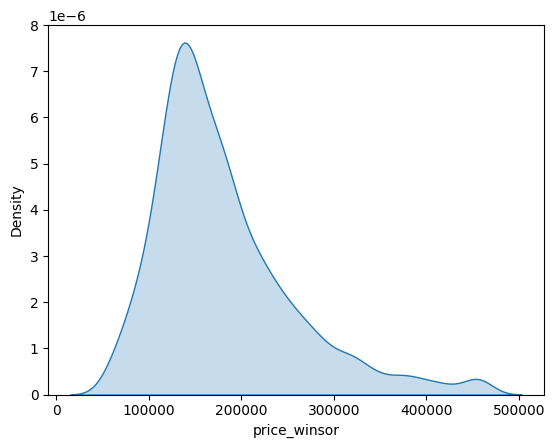

count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_winsor, dtype: float64


In [109]:
df = pd.read_csv('/content/data/ames_prices.csv')
college = pd.read_csv('/content/data/college_completion.csv')

sns.kdeplot(df['price'])
plt.show()
df["price"].describe()

sns.kdeplot(
    data=df,
    x="price",
    hue="Bldg.Type",
    fill=True,
    common_norm=False
    )

desc_by_control = (
    df
    .groupby("Bldg.Type", observed=True)["price"]
    .describe()
)
desc_by_control


sns.ecdfplot(data=df['price'])
plt.show()

price_clean = df["price"].dropna()

five_num_summary = price_clean.quantile([0, 0.25, 0.5, 0.75, 1])
print(five_num_summary)

df['price'].describe()

plt.boxplot(df['price'])
plt.show()


#outliers of boxplot price:
five_num_summary = price_clean.quantile([0, 0.25, 0.5, 0.75, 1])
print(five_num_summary)


#boxplot of price and buildings
df.boxplot(column='price', by='Bldg.Type')
price_hist = df.boxplot('price')
plt.show()


#dummy variables
Q1 = price_clean.quantile(0.25)
Q3 = price_clean.quantile(0.50)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df["price_outlier"] = (
    (df["price"] < lower_bound) |
    (df["price"] > upper_bound)
).astype(int)

df["price_outlier"].value_counts()

#1 = outliers

#winorize the price var

lower_w = price_clean.quantile(0.01)
upper_w = price_clean.quantile(0.99)

df["price_winsor"] = df["price"].clip(lower=lower_w, upper=upper_w)

sns.kdeplot(
    data=df,
    x="price_winsor",
    fill=True,
)
plt.show()

plt.show()

winsor_desc = df["price_winsor"].describe()
print(winsor_desc)